In [42]:
# 17-05-2020
# Research Paper

<hr>
<h3>Content</h3>
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br><br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
<hr>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

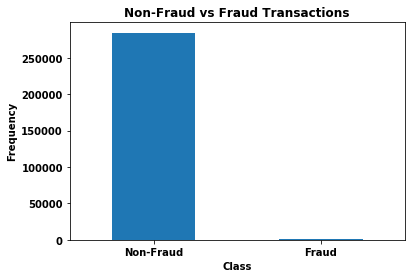

In [50]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Non-Fraud vs Fraud Transactions')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')

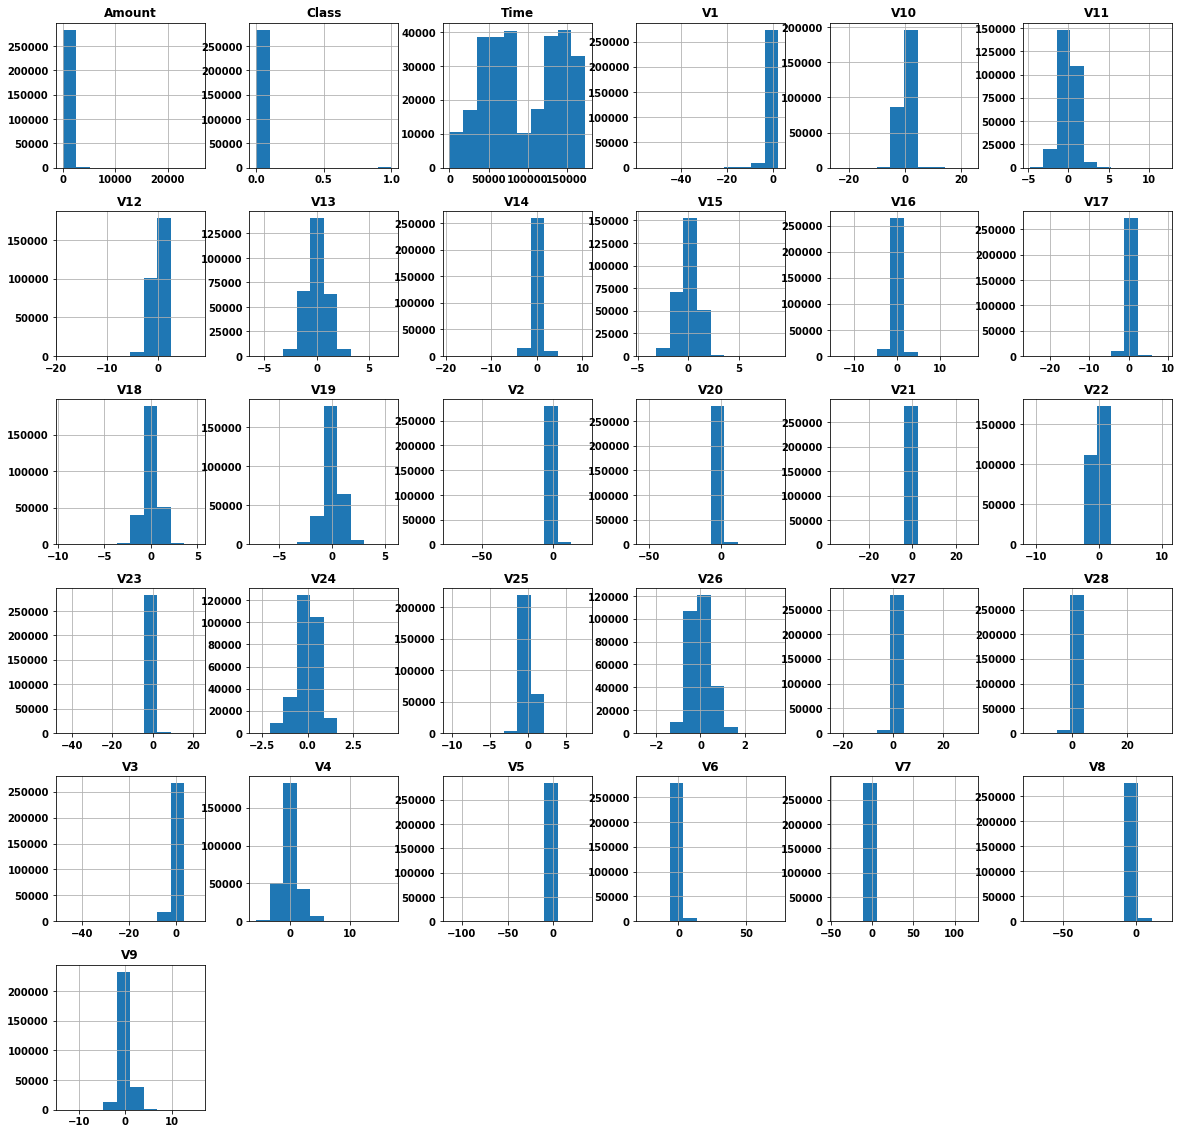

In [51]:
data.hist(figsize=(20,20));

In [52]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print('Fraud shape: {}'.format(fraud.shape))
print('Non-Fraud shape: {}'.format(normal.shape))
print('Percentage of fraud transcation: {:.4f}%'.format(len(fraud)/len(normal) * 100))

Fraud shape: (492, 31)
Non-Fraud shape: (284315, 31)
Percentage of fraud transcation: 0.1730%


In [53]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [54]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

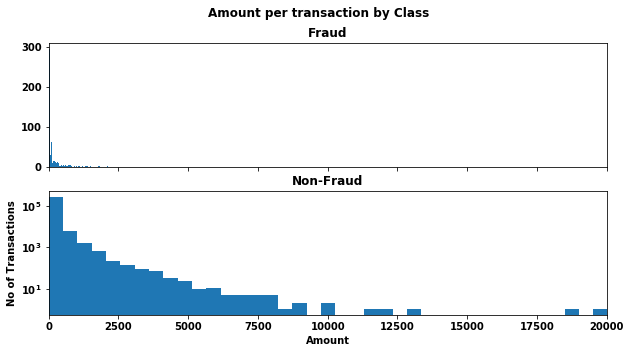

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.suptitle('Amount per transaction by Class')
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=50)
ax2.set_title('Non-Fraud')
plt.xlabel('Amount')
plt.ylabel('No of Transactions')
plt.xlim(0, 20000)
plt.yscale('log')

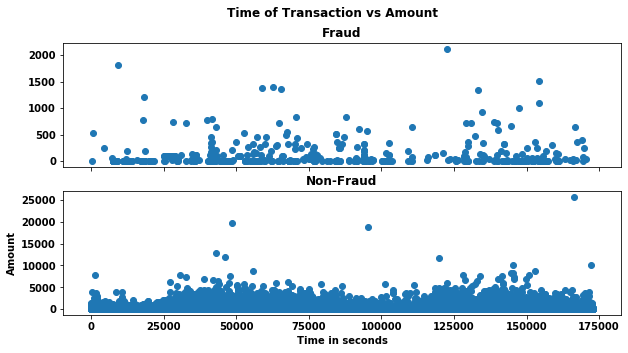

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5))
fig.suptitle('Time of Transaction vs Amount')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Non-Fraud')
plt.xlabel('Time in seconds')
plt.ylabel('Amount')
plt.show()

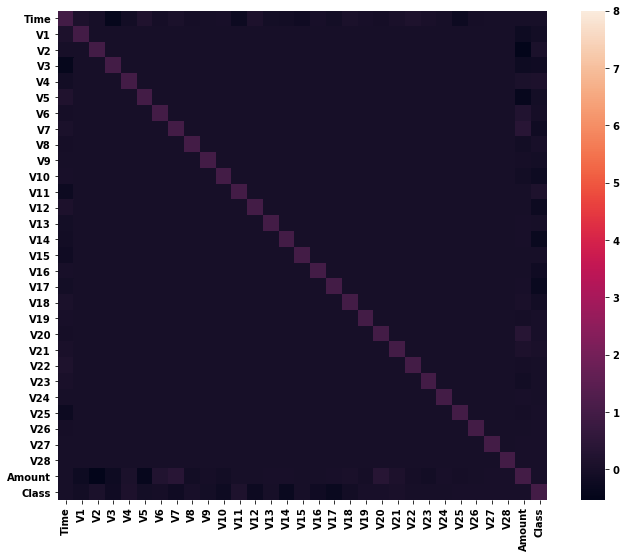

In [57]:
corr_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=8, square=True)

In [4]:
X = data.iloc[:,:-1] 
y = data[['Class']]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

In [63]:
%%time
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)

print('Logistic Regression \n')
print('Training Accuracy: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(log_reg.score(X_test, y_test)))
print('\n')

y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Logistic Regression 

Training Accuracy: 0.999
Test Accuracy: 0.999


[[56832    32]
 [   34    64]]


Precision Score: 0.667
Recall Score: 0.653
Wall time: 6.61 s


In [64]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier().fit(X_train, y_train)

print('Random Forest')
print('Training Accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test, y_test)))
print('\n')

y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Random Forest
Training Accuracy: 1.000
Test Accuracy: 0.999


[[56862     2]
 [   27    71]]
Precision Score: 0.973
Recall Score: 0.724
Wall time: 4min 38s


In [65]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

grbt = GradientBoostingClassifier().fit(X_train, y_train)
print('Training Accuracy: {:.3f}'.format(grbt.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(grbt.score(X_test, y_test)))
print('\n')

y_pred = grbt.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Training Accuracy: 0.998
Test Accuracy: 0.998


[[56859     5]
 [   82    16]]
Precision Score: 0.762
Recall Score: 0.163
Wall time: 4min


In [66]:
%%time
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
print('Training Accuracy: {:.3f}'.format(svc.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(svc.score(X_test, y_test)))
print('\n')

y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Training Accuracy: 0.998
Test Accuracy: 0.998


[[56864     0]
 [   98     0]]
Precision Score: 0.000
Recall Score: 0.000
Wall time: 19.9 s


In [67]:
%%time
from sklearn.svm import LinearSVC

lsvc = LinearSVC().fit(X_train, y_train)
print('Training Accuracy: {:.3f}'.format(lsvc.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(lsvc.score(X_test, y_test)))
print('\n')

y_pred = lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Training Accuracy: 0.998
Test Accuracy: 0.998


[[56864     0]
 [   96     2]]
Precision Score: 1.000
Recall Score: 0.020
Wall time: 38.1 s


In [11]:
%%time
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)
print('Training Accuracy: {:.3f}'.format(ada.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(ada.score(X_test, y_test)))
print('\n')

y_pred = ada.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Training Accuracy: 0.999
Test Accuracy: 0.999


[[56853    11]
 [   36    62]]


Precision Score: 0.849
Recall Score: 0.633
Wall time: 51.3 s


In [12]:
%%time
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier().fit(X_train, y_train)
print('Training Accuracy: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(mlp.score(X_test, y_test)))
print('\n')

y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')

print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

Training Accuracy: 0.998
Test Accuracy: 0.998


[[56791    73]
 [   20    78]]
Precision Score: 0.517
Recall Score: 0.796
Wall time: 9min 20s


In [68]:
print(np.unique(lsvc.predict(X_test)))

[0 1]


In [6]:
import pandas as pd
import numpy as np
import time
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [7]:
h = .02  # step size in the mesh

names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
precision = []
recall = []

for name, clf in zip(names, classifiers):
    start = time.time()
    name = clf.fit(X_train, y_train)
    end = time.time()
    y_pred = name.predict(X_test)
    
    print('****************************************************************************************')
    print('Model: {}'.format(name))
    print('\nTime taken: {:.2f}min'.format((end-start)/60))
    print('\nConfusion Matrix: \n')
    print(confusion_matrix(y_test, y_pred))
    print('\nPrecision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
    print('\nRecall Score: {:.3f}'.format(recall_score(y_test, y_pred)))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    print('****************************************************************************************')
    print('\n')
    
#     # Plotting decision regions
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                          np.arange(y_min, y_max, 0.1))

#     f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

#     idx = (product([0, 1], [0, 1]))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
#     axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
#                                       s=20, edgecolor='k')
#     axarr[idx[0], idx[1]].set_title(name)

#     plt.show()
    
i = recall.index(max(recall))
print('\nModel with best recall: {}'.format(names[i]))
print('\nRecall: {}, Precision: {}'.format(recall[i], precision[i]))

****************************************************************************************
Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Time taken: 0.05min

Confusion Matrix: 

[[56832    32]
 [   34    64]]

Precision Score: 0.667

Recall Score: 0.653
****************************************************************************************
****************************************************************************************
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Time taken: 0.05min

Confusion Matrix: 

[[56864     0]
 [   93     5]]

Precision Scor

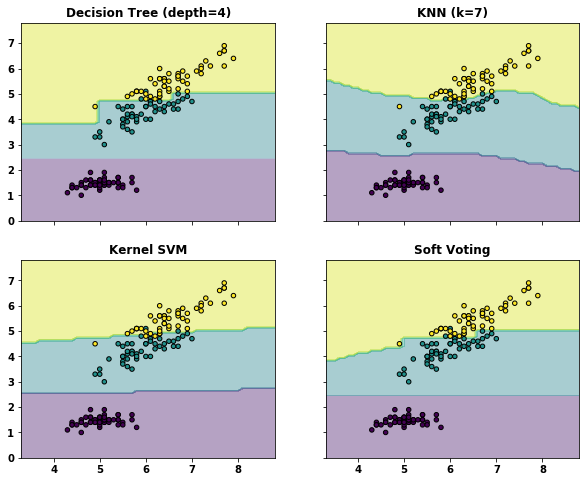

In [29]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

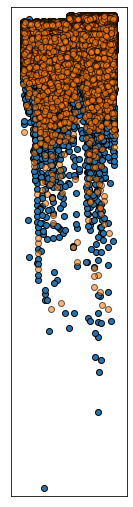

In [19]:
figure = plt.figure(figsize=(27, 9))
i = 1
# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], cmap=cm_bright,
               edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], cmap=cm_bright, alpha=0.6,
               edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

ValueError: query data dimension must match training data dimension

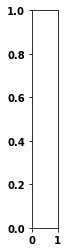

In [21]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
     # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()